In [1]:
#Page의 text 데이터를 하나의 데이터 프레임으로 합치기

import os
import ast 

PageText=os.listdir('Wiki_PageText')
documents=[] # 각 페이지의 text 저장
titles=[] # 각 페이지의 title 저장

PageText.sort()

for title in PageText:
    with open('Wiki_PageText/'+title,'r') as file:
        documents.append(file.read())

for Page_title in PageText:
    page_title=Page_title.replace('.txt','')
    titles.append(page_title)



In [2]:
PageTopics={} # page title - category가 저장
topic=[]

with open("Wiki_PageCategory_v4.txt",'r') as file:
    PageTopics=eval(file.read())
    topic=list(PageTopics.values())

In [3]:
import pandas as pd
import numpy as np


df=pd.DataFrame({'Title':titles, 'Category':topic,'Text': documents})
df

,Title,Category,Text
0,(ISC)²,"[(ISC)², Computer security organizations, Non-...",The International Information System Security ...
1,0x (decentralized exchange infrastructure),"[Blockchains, Ethereum tokens]","0x is an open-source, decentralized exchange i..."
2,0x80,"[Botnets, Computer criminals, Hackers, Unident...",0x80 is a hacker interviewed by Brian Krebs of...
3,1.1.1.1,"[Alternative Internet DNS services, Internet p...",1.1.1.1 is a free Domain Name System (DNS) ser...
4,123 Reg,[Companies based in the London Borough of Hill...,123 Reg is a British domain registrar and web ...
...,...,...,...
7957,ZumoDrive,"[Android media players, Android (operating sys...",ZumoDrive is a defunct cloud-based file hostin...
7958,Zyablov bound,"[Error detection and correction, Coding theory...","In coding theory, the Zyablov bound is a lower..."
7959,Zygalski sheets,"[Cryptographic attacks, Science and technology...",The method of Zygalski sheets was a cryptologi...
7960,Zynn,"[2020 software, Adware, Android (operating sys...",Zynn was a Chinese video-sharing social networ...


In [4]:
df.replace("",float("NaN"),inplace=True)
df.dropna(inplace=True)
df=df.reset_index()

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import preprocess_string

nltk.download('stopwords')

# 알파벳만 가져오도록 한다
def clean_text(d):
        pattern = r'[^a-zA-Z\s]'
        text = re.sub(pattern,'',d)
        return d

# 소문자 변환, stop words가 아닌 것만 가져오기, 단어의 길이가 3 초과
def clean_stopword(d):
        stop_words = stopwords.words('english')
        return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) >3])

# gensim에서 제공하는 것 사용하여 preprocessing하기
def preprocessing(d):
        return preprocess_string(d)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jiyunbae36/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# 데이터 전처리
df['Text'] = df['Text'].apply(clean_text)

In [7]:
df['Text'] = df['Text'].apply(clean_stopword)


In [8]:
tokenized_wiki= df['Text'].apply(preprocessing)
tokenized_wiki = tokenized_wiki.to_list()
print(tokenized_wiki)

In [9]:
#drop시킬 수 있는 것을 찾아서 drop_ sentence의 길이가 1 이하인 것은 없애기
import numpy as np

drop_wiki = [index for index, sentence in enumerate(tokenized_wiki) if len(sentence) <= 1]
page_texts = np.delete(tokenized_wiki, drop_wiki,axis=0) # 행 삭제
print(len(page_texts))

df.drop(drop_wiki)


7932


/home/jiyunbae36/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,index,Title,Category,Text
0,0,(ISC)²,"[(ISC)², Computer security organizations, Non-...",international information system security cert...
1,1,0x (decentralized exchange infrastructure),"[Blockchains, Ethereum tokens]","open-source, decentralized exchange infrastruc..."
2,2,0x80,"[Botnets, Computer criminals, Hackers, Unident...",0x80 hacker interviewed brian krebs washington...
3,3,1.1.1.1,"[Alternative Internet DNS services, Internet p...",1.1.1.1 free domain name system (dns) service ...
4,4,123 Reg,[Companies based in the London Borough of Hill...,british domain registrar hosting company found...
...,...,...,...,...
7927,7956,Zscaler,"[Companies in the Nasdaq-100, Companies listed...","zscaler ((us english)) cloud security company,..."
7928,7957,ZumoDrive,"[Android media players, Android (operating sys...",zumodrive defunct cloud-based file hosting ser...
7929,7958,Zyablov bound,"[Error detection and correction, Coding theory...","coding theory, zyablov bound lower bound rate ..."
7930,7959,Zygalski sheets,"[Cryptographic attacks, Science and technology...",method zygalski sheets cryptologic technique u...


In [10]:
#Gensim을 이용한 Topic Modeling
from gensim import corpora

dictionary = corpora.Dictionary(page_texts)
corpus = [dictionary.doc2bow(text) for text in page_texts]

#print(corpus[1])

In [11]:
from gensim.models import LdaModel
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary)
topics = lda_model.print_topics()
#topics

In [12]:

def format_topics_sentences(ldamodel=None, corpus=corpus,page_title=df['Title'], category=df['Category'],texts=df['Text']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    #Add title
    contents_title = pd.Series(page_title)
    sent_topics_df=pd.concat([sent_topics_df, contents_title], axis=1)
    
    #Add title
    contents_category = pd.Series(category)
    sent_topics_df=pd.concat([sent_topics_df, contents_category], axis=1)
    
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus,page_title=df['Title'], texts=df['Text'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Title','Category','Text']
df_dominant_topic=df_dominant_topic.sort_values(by='Dominant_Topic',ascending=[True])
df_dominant_topic = df_dominant_topic.reset_index()
df_dominant_topic

#df_dominant_topic.to_excel("wiki.xlsx")

,index,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Title,Category,Text
0,0,0,0.0,0.9980,"secur, inform, user, data, compani, servic, so...",(ISC)²,"[(ISC)², Computer security organizations, Non-...",international information system security cert...
1,3597,3597,0.0,0.5950,"secur, inform, user, data, compani, servic, so...",Intuitive Password,"[Password managers, Cross-platform software, I...",intuitive password proprietary freemium passwo...
2,4363,4363,0.0,0.9988,"secur, inform, user, data, compani, servic, so...",Medical device hijack,"[Medical privacy, Medical devices, Malware]",medical device hijack (also called medjack) ty...
3,1968,1968,0.0,0.6418,"secur, inform, user, data, compani, servic, so...",Dendroid (malware),"[Android (operating system) malware, Botnets, ...",dendroid malware affects android targets mobil...
4,5975,5975,0.0,0.9757,"secur, inform, user, data, compani, servic, so...",Riskware,"[Types of malware, Malware stubs]","riskware, portmanteau risk software, word used..."
...,...,...,...,...,...,...,...,...
7927,5870,5870,4.0,0.9998,"displaystyl, algorithm, number, secur, attack,...",Reed–Solomon error correction,"[Error detection and correction, Coding theory]",reed–solomon codes group error-correcting code...
7928,5869,5869,4.0,0.9991,"displaystyl, algorithm, number, secur, attack,...",Reed–Muller code,"[Error detection and correction, Coding theory...",reed–muller codes error-correcting codes used ...
7929,5868,5868,4.0,0.9810,"displaystyl, algorithm, number, secur, attack,...",Reeds–Sloane algorithm,"[Cryptanalytic algorithms, Cryptography stubs]","reeds–sloane algorithm, named james reeds neil..."
7930,5910,5910,4.0,0.9968,"displaystyl, algorithm, number, secur, attack,...",Repetition code,"[Coding theory, Error detection and correction]","coding theory, repetition code basic error-cor..."


In [13]:
topics_df=pd.DataFrame

topics_df = df_dominant_topic.groupby('Dominant_Topic').agg(list)
topics_df

,index,Document_No,Topic_Perc_Contrib,Keywords,Title,Category,Text
Dominant_Topic,,,,,,,
0.0,"[0, 3597, 4363, 1968, 5975, 5974, 5973, 5972, ...","[0, 3597, 4363, 1968, 5975, 5974, 5973, 5972, ...","[0.9980000257492065, 0.5950000286102295, 0.998...","[secur, inform, user, data, compani, servic, s...","[(ISC)², Intuitive Password, Medical device hi...","[[(ISC)², Computer security organizations, Non...",[international information system security cer...
1.0,"[5045, 6522, 4027, 7584, 6529, 6536, 7615, 283...","[5045, 6522, 4027, 7584, 6529, 6536, 7615, 283...","[0.9987000226974487, 0.8801000118255615, 0.542...","[network, secur, oper, system, protocol, serve...","[Open mail relay, Smack (software), Linux kern...","[[Email, Spamming], [2008 software, Linux kern...",[open mail relay simple mail transfer protocol...
2.0,"[4273, 4131, 4122, 4267, 4168, 3981, 4305, 419...","[4273, 4131, 4122, 4267, 4168, 3981, 4305, 419...","[0.9422000050544739, 0.9994000196456909, 0.949...","[state, unit, time, report, attack, inform, in...","[Maksim Yakubets, Logan Paul, Loebner Prize, M...","[[Computer criminals, Ukrainian criminals, Rus...",[maksim viktorovich yakubets (russian: максим ...
3.0,"[4221, 6158, 6157, 2104, 6156, 7825, 6153, 615...","[4221, 6158, 6157, 2104, 6156, 7825, 6153, 615...","[0.8295999765396118, 0.8740000128746033, 0.717...","[user, file, window, softwar, data, server, ve...","[MPEG Common Encryption, Same-origin policy, S...","[[MPEG, Digital rights management standards, C...",[mpeg common encryption (abbreviated mpeg-cenc...
4.0,"[435, 931, 440, 932, 7274, 583, 7116, 265, 777...","[435, 931, 440, 932, 7274, 583, 7116, 265, 777...","[0.8914999961853027, 0.9902999997138977, 0.931...","[displaystyl, algorithm, number, secur, attack...","[Atbash, CLEFIA, Attack model, CMAC, Two-Track...","[[Classical ciphers, Jewish mysticism, Hebrew-...",[atbash (hebrew: אתבש; also transliterated atb...


In [19]:
c_list=topics_df['Category']
attempt = []
for data in c_list:
    attempt.append([y for x in data for y in x])
topics_df['Category_flatten'] = attempt
topics_df.drop(labels='Category',axis=1)
topics_df

,index,Document_No,Topic_Perc_Contrib,Keywords,Title,Category,Text,Category_flatten
Dominant_Topic,,,,,,,,
0.0,"[0, 3597, 4363, 1968, 5975, 5974, 5973, 5972, ...","[0, 3597, 4363, 1968, 5975, 5974, 5973, 5972, ...","[0.9980000257492065, 0.5950000286102295, 0.998...","[secur, inform, user, data, compani, servic, s...","[(ISC)², Intuitive Password, Medical device hi...","[[(ISC)², Computer security organizations, Non...",[international information system security cer...,"[(ISC)², Computer security organizations, Non-..."
1.0,"[5045, 6522, 4027, 7584, 6529, 6536, 7615, 283...","[5045, 6522, 4027, 7584, 6529, 6536, 7615, 283...","[0.9987000226974487, 0.8801000118255615, 0.542...","[network, secur, oper, system, protocol, serve...","[Open mail relay, Smack (software), Linux kern...","[[Email, Spamming], [2008 software, Linux kern...",[open mail relay simple mail transfer protocol...,"[Email, Spamming, 2008 software, Linux kernel ..."
2.0,"[4273, 4131, 4122, 4267, 4168, 3981, 4305, 419...","[4273, 4131, 4122, 4267, 4168, 3981, 4305, 419...","[0.9422000050544739, 0.9994000196456909, 0.949...","[state, unit, time, report, attack, inform, in...","[Maksim Yakubets, Logan Paul, Loebner Prize, M...","[[Computer criminals, Ukrainian criminals, Rus...",[maksim viktorovich yakubets (russian: максим ...,"[Computer criminals, Ukrainian criminals, Russ..."
3.0,"[4221, 6158, 6157, 2104, 6156, 7825, 6153, 615...","[4221, 6158, 6157, 2104, 6156, 7825, 6153, 615...","[0.8295999765396118, 0.8740000128746033, 0.717...","[user, file, window, softwar, data, server, ve...","[MPEG Common Encryption, Same-origin policy, S...","[[MPEG, Digital rights management standards, C...",[mpeg common encryption (abbreviated mpeg-cenc...,"[MPEG, Digital rights management standards, Co..."
4.0,"[435, 931, 440, 932, 7274, 583, 7116, 265, 777...","[435, 931, 440, 932, 7274, 583, 7116, 265, 777...","[0.8914999961853027, 0.9902999997138977, 0.931...","[displaystyl, algorithm, number, secur, attack...","[Atbash, CLEFIA, Attack model, CMAC, Two-Track...","[[Classical ciphers, Jewish mysticism, Hebrew-...",[atbash (hebrew: אתבש; also transliterated atb...,"[Classical ciphers, Jewish mysticism, Hebrew-l..."


In [84]:
topics_df.to_excel("wiki_groupby_topic.xlsx")

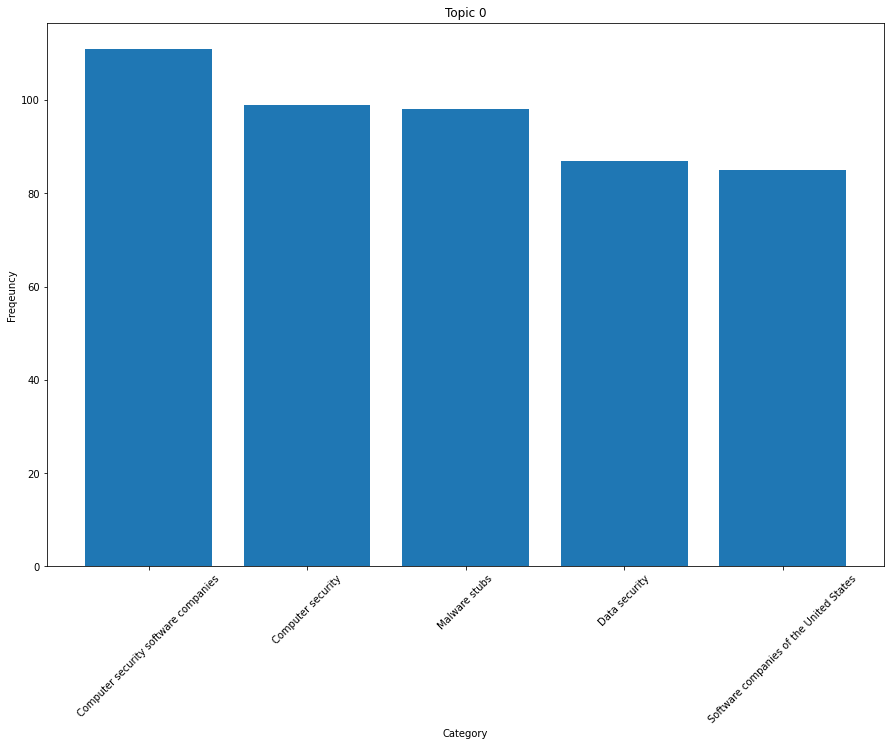

{'Computer security software companies': 111, 'Computer security': 99, 'Malware stubs': 98, 'Data security': 87, 'Software companies of the United States': 85}


<Figure size 432x288 with 0 Axes>

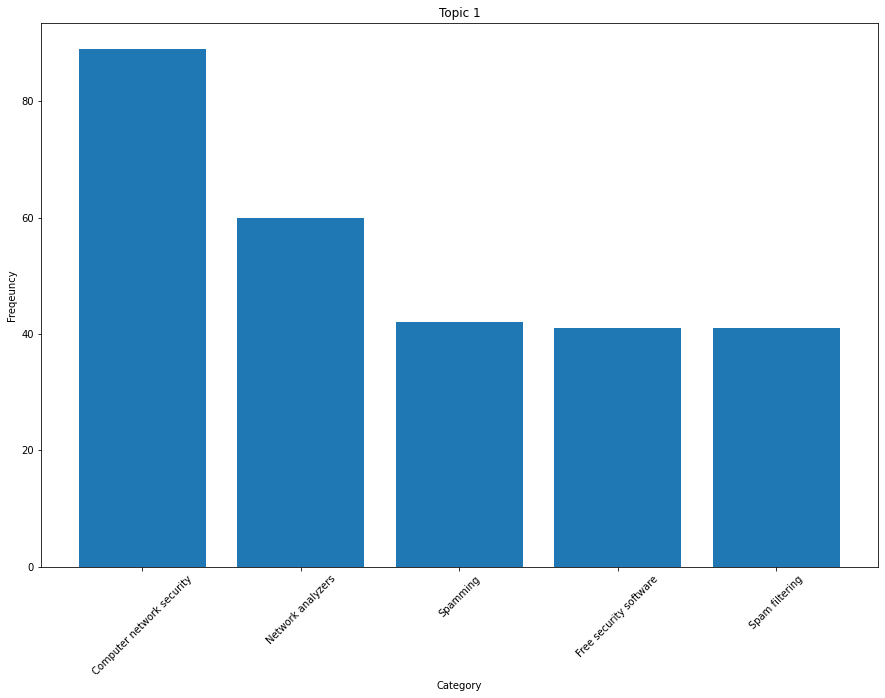

{'Computer network security': 89, 'Network analyzers': 60, 'Spamming': 42, 'Free security software': 41, 'Spam filtering': 41}


<Figure size 432x288 with 0 Axes>

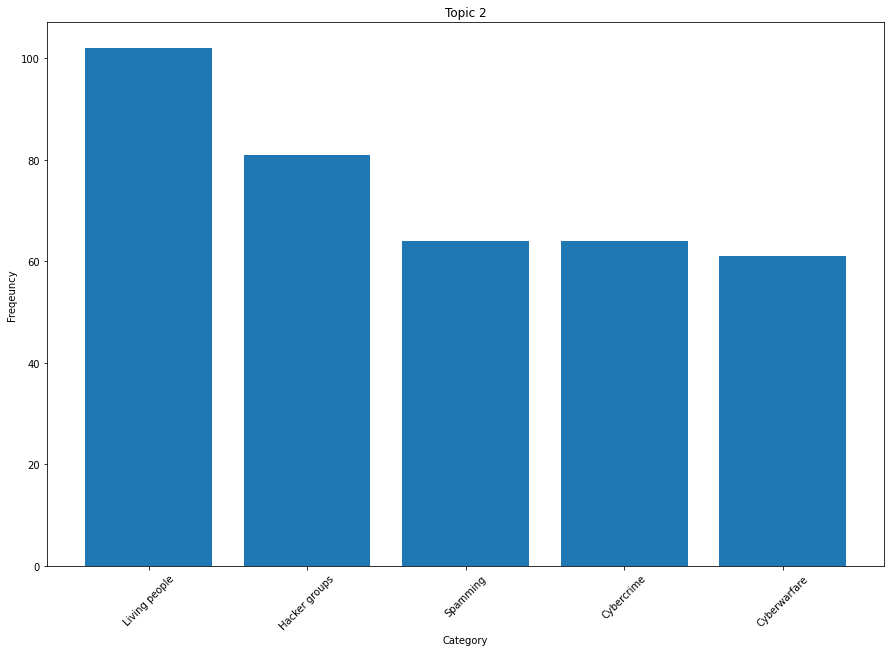

{'Living people': 102, 'Hacker groups': 81, 'Spamming': 64, 'Cybercrime': 64, 'Cyberwarfare': 61}


<Figure size 432x288 with 0 Axes>

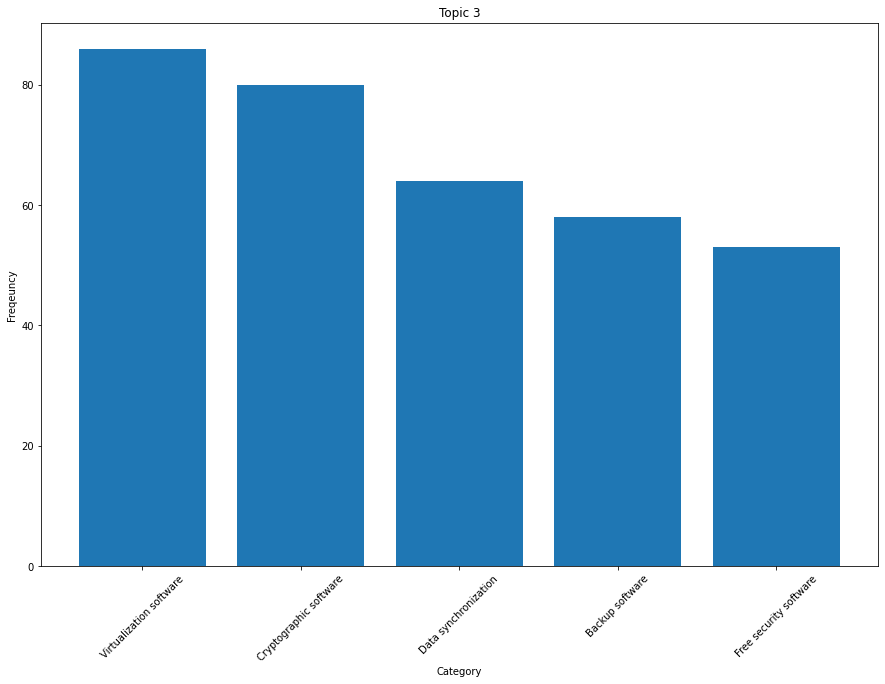

{'Virtualization software': 86, 'Cryptographic software': 80, 'Data synchronization': 64, 'Backup software': 58, 'Free security software': 53}


<Figure size 432x288 with 0 Axes>

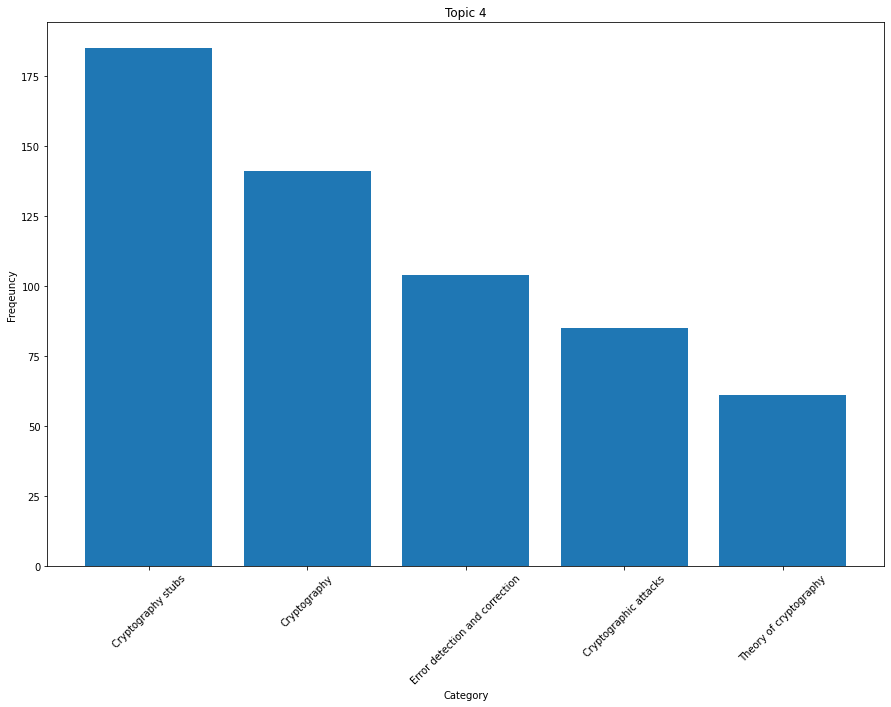

{'Cryptography stubs': 185, 'Cryptography': 141, 'Error detection and correction': 104, 'Cryptographic attacks': 85, 'Theory of cryptography': 61}


<Figure size 432x288 with 0 Axes>

In [100]:
import matplotlib.pyplot as plt

c_list=topics_df['Category']
  
def bar_graph(to_list,t):    
    d = dict()

    for i in to_list:
        if i not in d:
            d[i]=0
        d[i]+=1
        
    sorted_dict=dict(sorted(d.items(),key=lambda x: x[1],reverse=True)[:5])
    
    
    plt.figure(figsize=(15, 10))
    x=np.arange(len(sorted_dict))
    plt.bar(x, sorted_dict.values())
    plt.xticks(x,sorted_dict.keys(),rotation=45)
    plt.title(f'Topic {t}')
    plt.xlabel('Category')
    plt.ylabel('Freqeuncy')
    plt.show()
    print(sorted_dict)
    
    plt.savefig(f'Topic{t}.png')
for t in range(5):
    to_list=topics_df.iloc[t,7]
    bar_graph(to_list,t)

In [83]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis= pyLDAvis.gensim.prepare(lda_model,corpus,dictionary)
pyLDAvis.display(vis)

In [85]:
pyLDAvis.save_html(vis, 'output_LDA.html')